In [1]:
#Import Liberaries
import pandas as pd
import tensorflow as tf

In [2]:
#Reading Dataset FIle
df = pd.read_csv('housepricedata.csv')

In [3]:
#DIsplaying dataframe
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [5]:
#Splliting features and target values in X and Y respectively
X = dataset[:,0:10]
Y = dataset[:,10]

In [6]:
#importing preprocessing liberary for data preprocessing 
from sklearn import preprocessing

In [7]:
#scales the dataset so that all the input features lie between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [8]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#test and training data splitting 
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [11]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [13]:
#istalling Keras framework
!pip3 install keras

In [74]:
from keras.models import Sequential
from keras.layers import Dense

We have our first layer as a dense layer with 32 neurons, ReLU activation and the input shape is 10 since we have 10 input features. Note that ‘Dense’ refers to a fully-connected layer, which is what we will be using.

Our second layer is also a dense layer with 32 neurons, ReLU activation. Note that we do not have to describe the input shape since Keras can infer from the output of our first layer.

Our third layer is a dense layer with 1 neuron, sigmoid activation.

In [79]:
# using the Sequential model, which means that we merely need to describe the layers
model = Sequential([
    Dense(128, activation='relu', input_shape=(10,)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid'),
])

We put the following settings inside the brackets after model.compile:

optimizer='sgd'

‘sgd’ refers to stochastic gradient descent (over here, it refers to mini-batch gradient descent)
loss='binary_crossentropy'

The loss function for outputs that take the values 1 or 0 is called binary cross entropy.

metrics=['accuracy']

Lastly, we want to track accuracy on top of the loss function. Now once we’ve run that cell, we are ready to train!

In [80]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

The function is called ‘fit’ as we are fitting the parameters to the data. We have to specify what data we are training on, which is X_train and Y_train. Then, we specify the size of our mini-batch and how long we want to train it for (epochs). Lastly, we specify what our validation data is so that the model will tell us how we are doing on the validation data at each point. This function will output a history, which we save under the variable hist. We’ll use this variable a little later when we get to visualization.

In [85]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 12ms/step - loss: 0.2665 - accuracy: 0.8845 - val_loss: 0.1914 - val_accuracy: 0.9269
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.2653 - accuracy: 0.8845 - val_loss: 0.1922 - val_accuracy: 0.9269
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2654 - accuracy: 0.8845 - val_loss: 0.1965 - val_accuracy: 0.9178
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.2646 - accuracy: 0.8875 - val_loss: 0.1943 - val_accuracy: 0.9178
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.2644 - accuracy: 0.8894 - val_loss: 0.2011 - val_accuracy: 0.9132
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2652 - accuracy: 0.8845 - val_loss: 0.1952 - val_accuracy: 0.9178
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.2645 - accuracy: 0.8845 - val_loss: 0.1918 - val_accuracy: 0.9269
Epoch 8/100


To find the accuracy on our test set. 
The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element.

In [86]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 4ms/step - loss: 0.2269 - accuracy: 0.9269


0.9269406199455261

In [87]:
import matplotlib.pyplot as plt

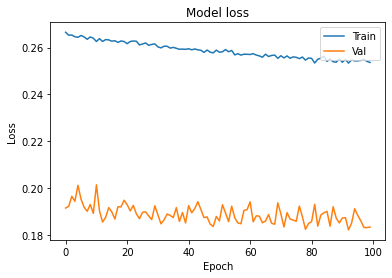

In [88]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

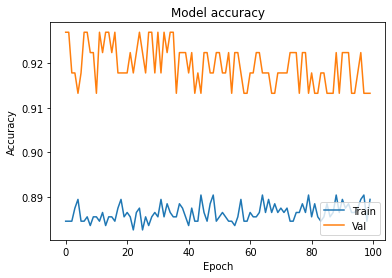

In [89]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [90]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1,   activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=16, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
64/64 [==============================] - 5s 55ms/step - loss: 0.5530 - accuracy: 0.6984 - val_loss: 0.2381 - val_accuracy: 0.8950
Epoch 2/100
64/64 [==============================] - 2s 33ms/step - loss: 0.3689 - accuracy: 0.8601 - val_loss: 0.2283 - val_accuracy: 0.9087
Epoch 3/100
64/64 [==============================] - 2s 29ms/step - loss: 0.3504 - accuracy: 0.8689 - val_loss: 0.2094 - val_accuracy: 0.9041
Epoch 4/100
64/64 [==============================] - 2s 29ms/step - loss: 0.3121 - accuracy: 0.8708 - val_loss: 0.2575 - val_accuracy: 0.9087
Epoch 5/100
64/64 [==============================] - 2s 28ms/step - loss: 0.2969 - accuracy: 0.8576 - val_loss: 0.2034 - val_accuracy: 0.9132
Epoch 6/100
64/64 [==============================] - 2s 30ms/step - loss: 0.3121 - accuracy: 0.8583 - val_loss: 0.1864 - val_accuracy: 0.9041
Epoch 7/100
64/64 [==============================] - 2s 27ms/step - loss: 0.3203 - accuracy: 0.8806 - val_loss: 0.2326 - val_accuracy: 0.9087
Epoch 

In [91]:
model_2.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 21ms/step - loss: 0.4497 - accuracy: 0.8950


0.8949771523475647

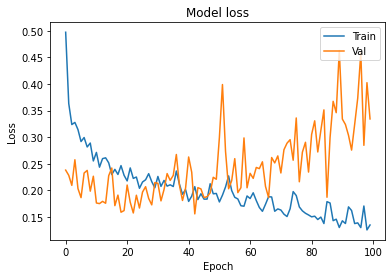

In [92]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

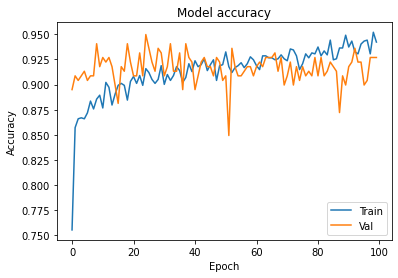

In [93]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [94]:
from keras.layers import Dropout
from keras import regularizers

In [95]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.2),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [97]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=16, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
64/64 [==============================] - 10s 84ms/step - loss: 0.4767 - accuracy: 0.8587 - val_loss: 0.3530 - val_accuracy: 0.9315
Epoch 2/100
64/64 [==============================] - 3s 46ms/step - loss: 0.4880 - accuracy: 0.8638 - val_loss: 0.3801 - val_accuracy: 0.9087
Epoch 3/100
64/64 [==============================] - 3s 47ms/step - loss: 0.4711 - accuracy: 0.8697 - val_loss: 0.3699 - val_accuracy: 0.9041
Epoch 4/100
64/64 [==============================] - 3s 44ms/step - loss: 0.4339 - accuracy: 0.8726 - val_loss: 0.3733 - val_accuracy: 0.9132
Epoch 5/100
64/64 [==============================] - 3s 45ms/step - loss: 0.4220 - accuracy: 0.8817 - val_loss: 0.3980 - val_accuracy: 0.8950
Epoch 6/100
64/64 [==============================] - 3s 45ms/step - loss: 0.4597 - accuracy: 0.8663 - val_loss: 0.3550 - val_accuracy: 0.9087
Epoch 7/100
64/64 [==============================] - 3s 45ms/step - loss: 0.4458 - accuracy: 0.8710 - val_loss: 0.3799 - val_accuracy: 0.9041
Epoch

In [98]:
model_3.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 33ms/step - loss: 0.3942 - accuracy: 0.9041


0.9041095972061157

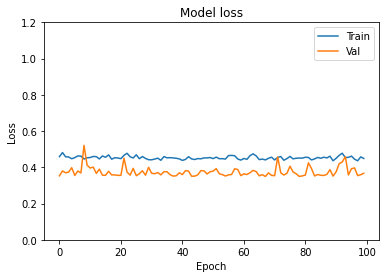

In [99]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

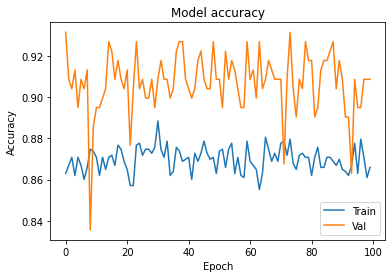

In [100]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()